In [1]:
import cobra
import numpy as np
from cobra import Model, Reaction, Metabolite
import matplotlib.pyplot as plt
import pandas as pd

# Load model

In [2]:
model = cobra.io.load_json_model('SI3_iJN1411final_flux.json')
model.solver = 'cplex'

Academic license - for non-commercial use only


In [3]:
model.objective.expression

1.0*BiomassKT2440_WT3 - 1.0*BiomassKT2440_WT3_reverse_2cf2b

# Set glycerol minimal medium

In [4]:
for rxn in model.exchanges:
    rxn.lower_bound = 0

glyc_min_media = {
        'EX_glyc_e_':-10,        # glycerol
        'EX_nh4_e_': -1000,      # ammonium
        'EX_pi_e_':  -1000,      # phosphate
        'EX_so4_e_': -1000,      # sulfate
        'EX_fe3_e_': -1000,      # fe3+
        'EX_mn2_e_': -1000,      # mn2+
        'EX_zn2_e_': -1000,      # zn2+
        'EX_cu2_e_': -1000,      # cu2+
        'EX_ca2_e_': -1000,      # ca2+
        'EX_cl_e_' : -1000,      # cl-
        'EX_cobalt2_e_': -1000,  # cobalt
        'EX_k_e_':   -1000,      # k
        'EX_mobd_e_'   : -1000,  # mo6+
        'EX_na1_e_'    : -1000,     # na+
        'EX_ni2_e_'    : -1000,     # ni2+
        'EX_mg2_e_': -1000,      # mg2+
        'EX_o2_e_':  -1000
    }

for r in glyc_min_media.keys():
    try:
        rxn = model.reactions.get_by_id(r)
        rxn.lower_bound = glyc_min_media[r]
        rxn.upper_bound = 1000
    except:
        print("The reaction {} does not exist in model.".format(str(r)))
        continue

print('growth rate = %2.2f' % (model.slim_optimize()))

growth rate = 0.60


# Find reactions involving DTDP-4-dehydro-6-deoxy-L-mannose (dtdpddm in iMO1053 model)

In [5]:
model.metabolites.dtdp4d6dm_c

Metabolite identifier,dtdp4d6dm_c
Name,M_dTDP_4_dehydro_6_deoxy_L_mannose_C16H22N2O15P2
Memory address,0x0139dce210
Formula,
Compartment,Cytosol
In 2 reaction(s),"TDPDRR, TDPDRE"


# Find reactions involving (S)-3-Hydroxydecanoyl-CoA (3hdccoa in iMO1053 model)

In [6]:
model.metabolites.get_by_id('3hdcoa_c')

Metabolite identifier,3hdcoa_c
Name,M__S__3_Hydroxydecanoyl_CoA_C31H50N7O18P3S
Memory address,0x0139cc4710
Formula,
Compartment,Cytosol
In 2 reaction(s),"HACD4i, ECOAH4"


# Find reactions involving (3R)-3-Hydroxydecanoyl-[acyl-carrier protein] (3hdeACP in iMO1053 model)

In [7]:
model.metabolites.get_by_id('3hdecACP_c')

Metabolite identifier,3hdecACP_c
Name,M__R__3_Hydroxydecanoyl_acyl_carrier_protein_C2...
Memory address,0x0139cc48d0
Formula,
Compartment,Cytosol
In 4 reaction(s),"3HAACOAT100, 3OAR100, 3HAD100, UAGAAT2"


# Find reactions involving (3R)-3-hydroxyacyl-[acyl-carrier protein]

In [8]:
model.metabolites.get_by_id('3haACP_c')

Metabolite identifier,3haACP_c
Name,M__3R__3_Hydroxyacyl_acyl_carrier_protein_C15H2...
Memory address,0x0139cc44d0
Formula,
Compartment,Cytosol
In 2 reaction(s),"3HAD40, 3OAR40"


# Find reactions involving Acyl carrier protein

In [9]:
model.metabolites.get_by_id('ACP_c')

Metabolite identifier,ACP_c
Name,M_acyl_carrier_protein_C11H21N2O7PRS
Memory address,0x0139d32750
Formula,
Compartment,Cytosol
In 67 reaction(s),"FA100ACPHi, 3OAS80, ACOATA, 3HAACOAT120, FA120ACPHi, UAGAAT2, ACPPAT181, AGPAT141, ACPPAT180, ACPPAT140, FA140ACPHi, KAS14, AGPAT140, 3HAACOAT121, 3OAS180, AGPAT161, G3PAT161, AGPAT160, 3OAS160, FA..."


# Build iJN1411 model with Rhamnolipid biosynthesis pathway

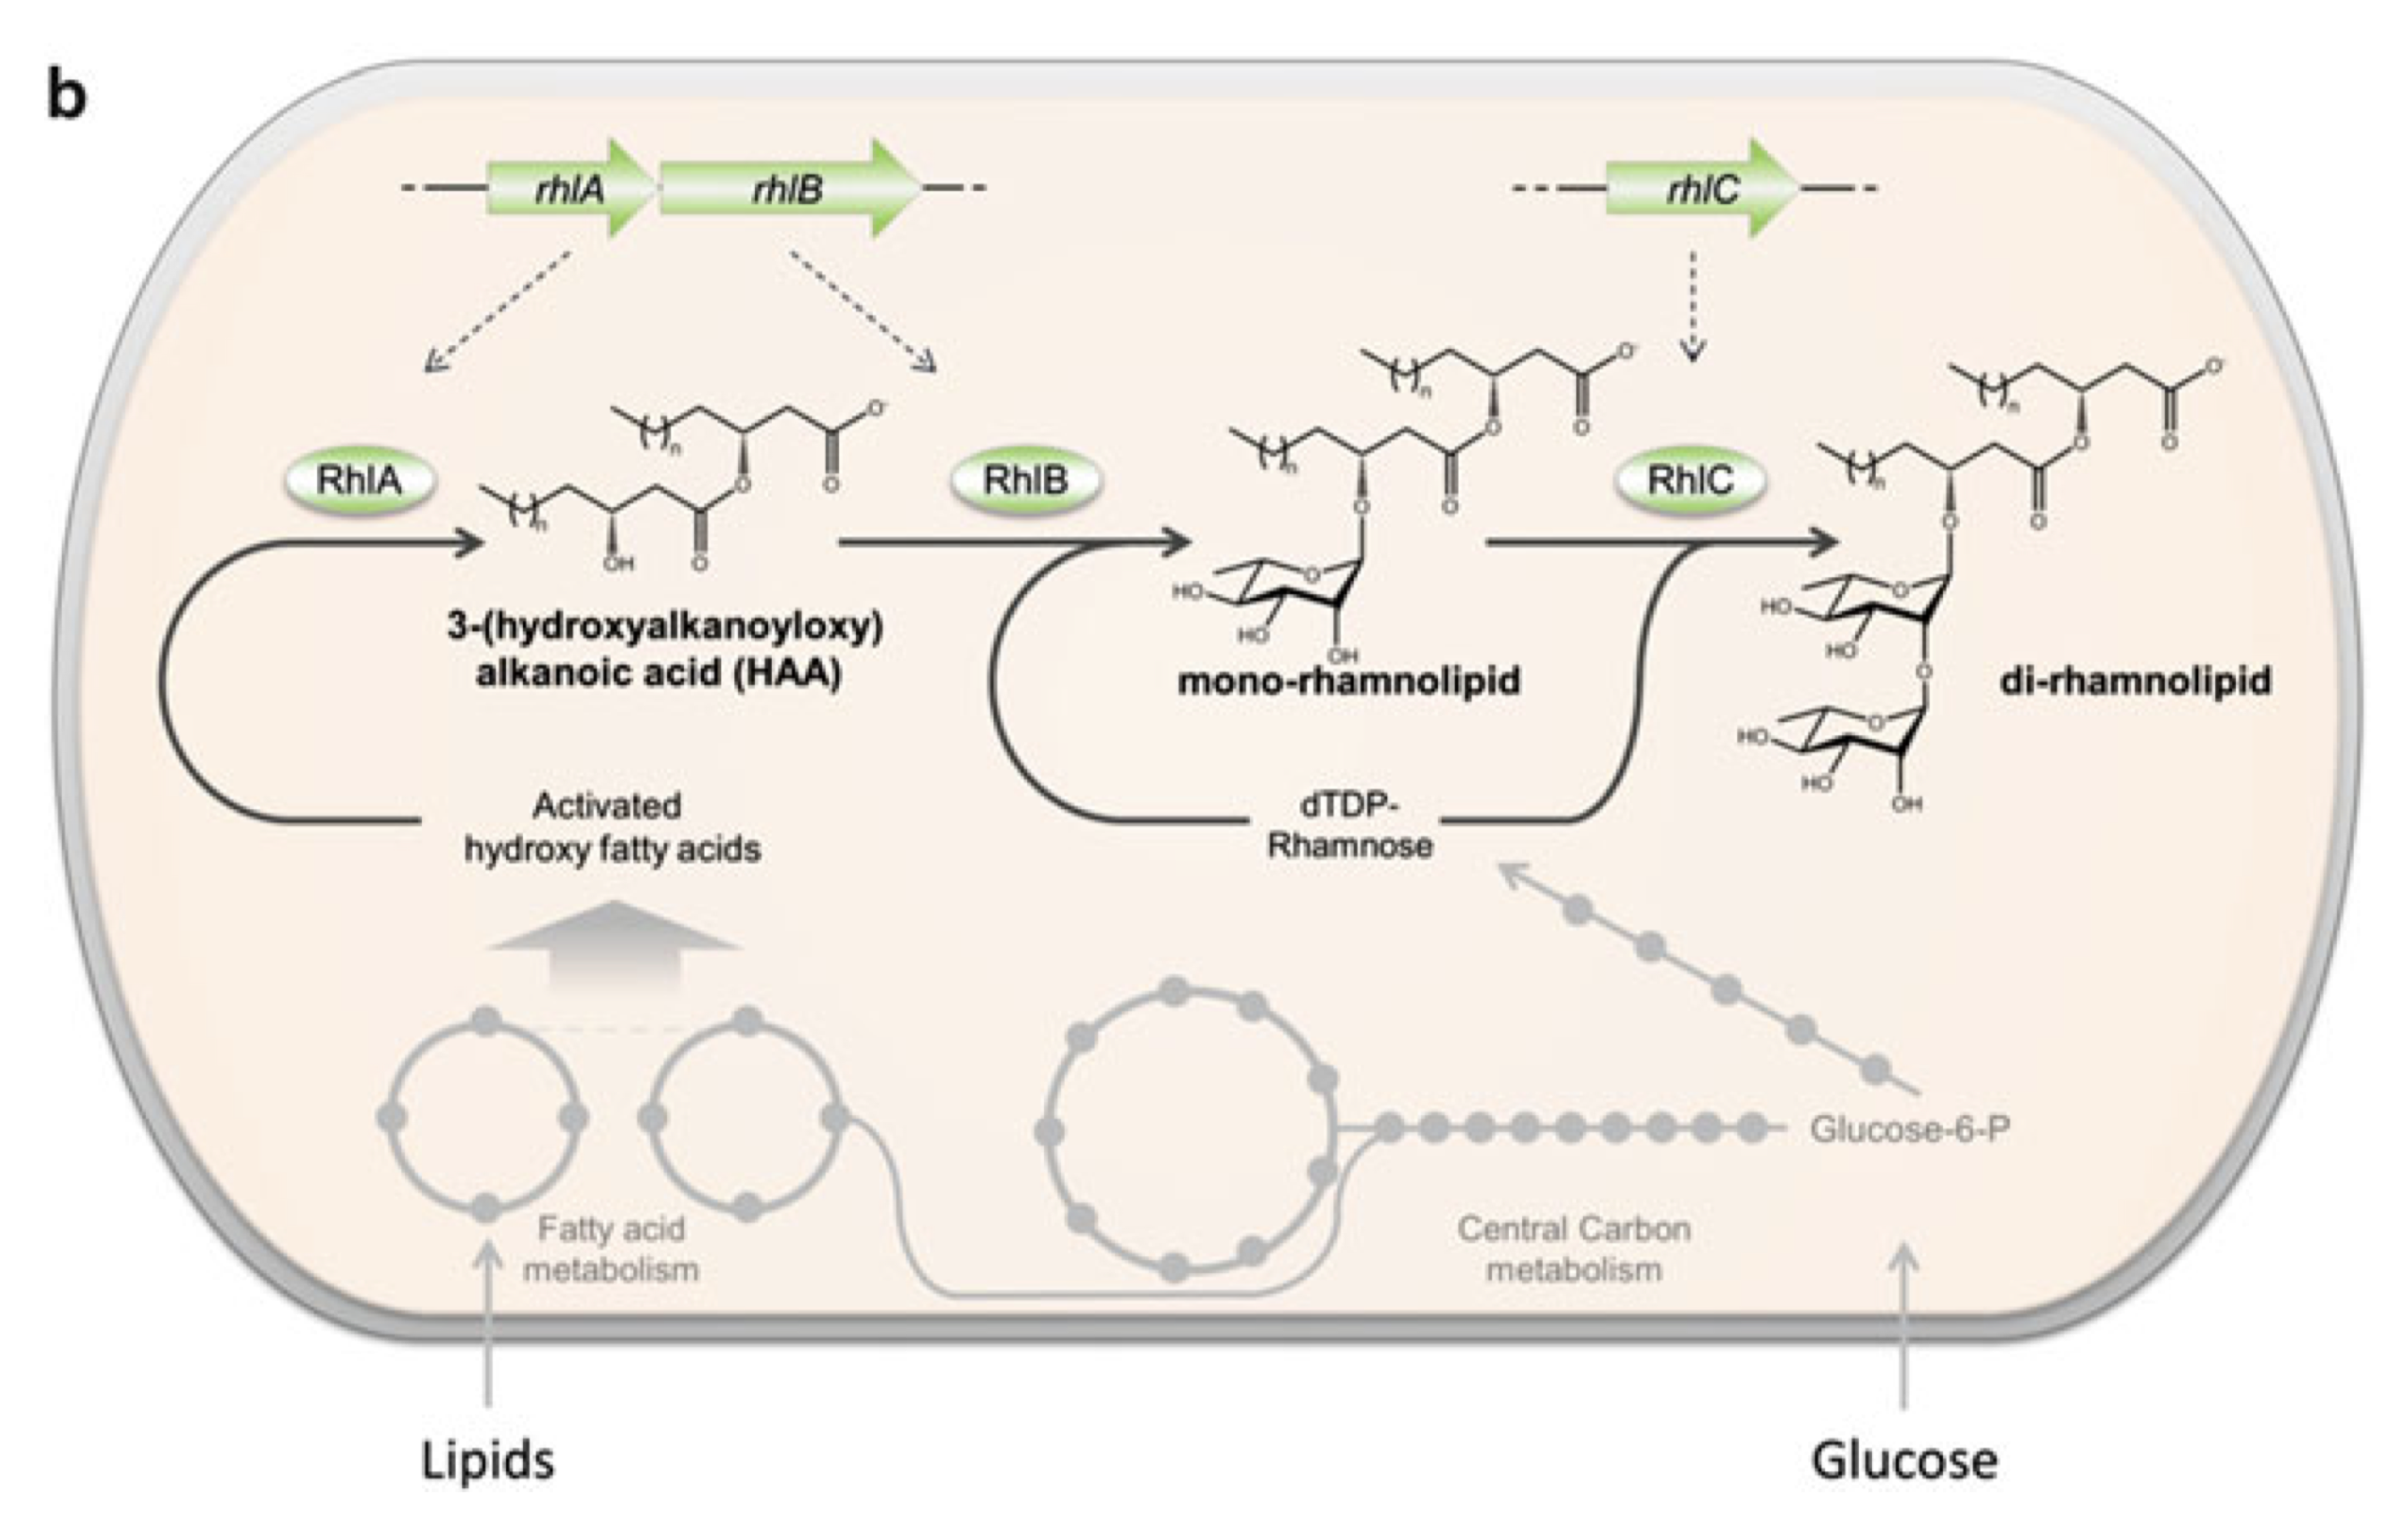

In [10]:
from IPython.display import Image
Image(filename='rhamnolipid_biosynthesis.png', width=500)

In [11]:
# metabolits to be added
# haa_c
# lrhh_c
# llrhh_c
# haa_p
# lrhh_p
# llrhh_p
# haa_e
# lrhh_e
# llrhh_e

# reactions to be added
# RhlA: 2 3haACP_c + h2o_c -> haa_c + 2 ACP_c + h_c
# RhlB: dtdp4d6dm_c + haa_c -> lrhh_c + dtdp_c + h_c
# RhlC: dtdp4d6dm_c + lrhh_c --> dtdp_c + llrhh_c + h_c
# haa_c <--> haa_p
# lrhh_c <--> lrhh_p
# llrhh_c <--> llrhh_p
# haa_p <--> haa_e
# lrhh_p <--> lrhh_e
# llrhh_p <--> llrhh_e
# haa_e -->
# lrhh_e -->
# llrhh_e -->

In [12]:
haa_c = Metabolite(
        'haa_c',
        formula='C([R2])[C@H](CC(=O)O[C@H](C[R1])CC(=O)[O-])O',
        name='M_3___3_hydroxyalkanoyloxy__alkanoate',
        compartment='Cytosol')
lrhh_c = Metabolite(
        'lrhh_c',
        formula='C26H46O9',
        name='M_L_rhamnosyl_3_hydroxydecanoyl_3_hydroxydecanoate_C26H46O9',
        compartment='Cytosol')
llrhh_c = Metabolite(
        'llrhh_c',
        formula='C32H58O13',
        name='M_L_rhamnosyl_Lrhamnosyl_3_hydroxydecanoyl_3_hydroxydecanoate_C32H58O13',
        compartment='Cytosol')
haa_p = Metabolite(
        'haa_p',
        formula='C([R2])[C@H](CC(=O)O[C@H](C[R1])CC(=O)[O-])O',
        name='M_3___3_hydroxyalkanoyloxy__alkanoate',
        compartment='Periplasm')
lrhh_p = Metabolite(
        'lrhh_p',
        formula='C26H46O9',
        name='M_L_rhamnosyl_3_hydroxydecanoyl_3_hydroxydecanoate_C26H46O9',
        compartment='Periplasm')
llrhh_p = Metabolite(
        'llrhh_p',
        formula='C32H58O13',
        name='M_L_rhamnosyl_rhamnosyl_3_hydroxydecanoyl_3_hydroxydecanoate_C32H58O13',
        compartment='Periplasm')
haa_e = Metabolite(
        'haa_e',
        formula='C([R2])[C@H](CC(=O)O[C@H](C[R1])CC(=O)[O-])O',
        name='M_3___3_hydroxyalkanoyloxy__alkanoate',
        compartment='Extra_organism')
lrhh_e = Metabolite(
        'lrhh_e',
        formula='C26H46O9',
        name='M_L_rhamnosyl_3_hydroxydecanoyl_3_hydroxydecanoate_C26H46O9',
        compartment='Extra_organism')
llrhh_e = Metabolite(
        'llrhh_e',
        formula='C32H58O13',
        name='M_L_rhamnosyl_rhamnosyl_3_hydroxydecanoyl_3_hydroxydecanoate_C32H58O13',
        compartment='Extra_organism')

In [13]:
# 2 3haACP_c + h2o_c -> haa_c + 2 ACP_c + h_c
reaction1 = Reaction('RHLA')
reaction1.name = 'R_rhamnosyltransferase_chain_A_'
reaction1.subsystem = 'S_Rhamnolipid_Synthesis'
reaction1.lower_bound = 0
reaction1.upper_bound = +999999.0
reaction1.add_metabolites({
    model.metabolites.get_by_id('3haACP_c'): -2.0, # 3haACP
    model.metabolites.get_by_id('h2o_c'): -1.0, # h2o
    haa_c: +1.0, # haa
    model.metabolites.get_by_id('ACP_c'): +2.0, # ACP
    model.metabolites.get_by_id('h_c'): +1.0 # h
})
reaction1.gene_reaction_rule = 'PA3479'

# dtdp4d6dm_c + haa_c -> lrhh_c + dtdp_c + h_c
reaction2 = Reaction('RHLB')
reaction2.name = 'R_rhamnosyltransferase_chain_B_'
reaction2.subsystem = 'S_Rhamnolipid_Synthesis'
reaction2.lower_bound = 0
reaction2.upper_bound = +999999.0
reaction2.add_metabolites({
    model.metabolites.get_by_id('dtdp4d6dm_c'): -1.0, # dtdp4d6dm
    haa_c: -1.0, # haa
    model.metabolites.get_by_id('h_c'): +1.0, # h
    lrhh_c: +1.0, # lrhh
    model.metabolites.get_by_id('dtdp_c'): +1.0 # dtdp
})
reaction2.gene_reaction_rule = 'PA3478'

# dtdp4d6dm_c + lrhh_c --> dtdp_c + llrhh_c + h_c
reaction3 = Reaction('RHLC')
reaction3.name = 'R_rhamnosyltransferase_2_'
reaction3.subsystem = 'S_Rhamnolipid_Synthesis'
reaction3.lower_bound = 0
reaction3.upper_bound = +999999.0
reaction3.add_metabolites({
    model.metabolites.get_by_id('dtdp4d6dm_c'): -1.0, # dtdp4d6dm
    lrhh_c: -1.0, # lrhh
    model.metabolites.get_by_id('dtdp_c'): +1.0, # dtdp
    llrhh_c: +1.0, # llrhh
    model.metabolites.get_by_id('h_c'): +1.0 # h
})
reaction3.gene_reaction_rule = 'PA1130'

# haa_c <--> haa_p
reaction4 = Reaction('HAAt2rpp')
reaction4.name = 'R_rhamnolipid_precursor_reversible_transport__periplasm_'
reaction4.subsystem = 'S_Transport__Inner_Membrane'
reaction4.lower_bound = -999999.0
reaction4.upper_bound = +999999.0
reaction4.add_metabolites({
    haa_c: -1.0, # haa
    haa_p: +1.0 # haaa
})
reaction4.gene_reaction_rule = ''

# lrhh_c <--> lrhh_p
reaction5 = Reaction('LRHHt2rpp')
reaction5.name = 'R_mono_rhamnolipid_reversible_transport__periplasm_'
reaction5.subsystem = 'S_Transport__Inner_Membrane'
reaction5.lower_bound = -999999.0
reaction5.upper_bound = +999999.0
reaction5.add_metabolites({
    lrhh_c: -1.0, # lrhh
    lrhh_p: +1.0 # lrhh
})
reaction5.gene_reaction_rule = ''

# llrhh_c <--> llrhh_p
reaction6 = Reaction('LLRHHt2rpp')
reaction6.name = 'R_di_rhamnolipid_reversible_transport__periplasm_'
reaction6.subsystem = 'S_Transport__Inner_Membrane'
reaction6.lower_bound = -999999.0
reaction6.upper_bound = +999999.0
reaction6.add_metabolites({
    llrhh_c: -1.0, # llrhh
    llrhh_p: +1.0 # llrhh
})
reaction6.gene_reaction_rule = ''

# haa_p <--> haa_e
reaction7 = Reaction('HAAtex')
reaction7.name = 'R_rhamnolipid_precursor_transport_via_diffusion__extracellular_to_periplasm_'
reaction7.subsystem = 'S_Transport__Outer_Membrane'
reaction7.lower_bound = -999999.0
reaction7.upper_bound = +999999.0
reaction7.add_metabolites({
    haa_p: -1.0, # haa
    haa_e: +1.0 # haa
})
reaction7.gene_reaction_rule = ''

# lrhh_p <--> lrhh_e
reaction8 = Reaction('LRHHtex')
reaction8.name = 'R_mono_rhamnolipid_transport_via_diffusion__extracellular_to_periplasm_'
reaction8.subsystem = 'S_Transport__Outer_Membrane'
reaction8.lower_bound = -999999.0
reaction8.upper_bound = +999999.0
reaction8.add_metabolites({
    lrhh_p: -1.0, # lrhh
    lrhh_e: +1.0 # lrhh
})
reaction8.gene_reaction_rule = ''

# llrhh_p <--> llrhh_e
reaction9 = Reaction('LLRHHtex')
reaction9.name = 'R_di_rhamnolipid_transport_via_diffusion__extracellular_to_periplasm_'
reaction9.subsystem = 'S_Transport__Outer_Membrane'
reaction9.lower_bound = -999999.0
reaction9.upper_bound = +999999.0
reaction9.add_metabolites({
    llrhh_p: -1.0, # llrhh
    llrhh_e: +1.0 # llrhh
})
reaction9.gene_reaction_rule = ''

# haa_e --> 
reaction10 = Reaction('EX_haa_e_')
reaction10.name = 'R_HAA_exchange'
reaction10.subsystem = 'S_'
reaction10.lower_bound = 0
reaction10.upper_bound = +999999.0
reaction10.add_metabolites({
    haa_e: -1.0 # haa
})
reaction10.gene_reaction_rule = ''

# lrhh_e --> 
reaction11 = Reaction('EX_lrhh_e_')
reaction11.name = 'R_LRHH_exchange'
reaction11.subsystem = 'S_'
reaction11.lower_bound = 0
reaction11.upper_bound = +999999.0
reaction11.add_metabolites({
    lrhh_e: -1.0 # lrhh
})
reaction11.gene_reaction_rule = ''

# llrhh_e -->
reaction12 = Reaction('EX_llrhh_e_')
reaction12.name = 'R_LLRHH_exchange'
reaction12.subsystem = 'S_'
reaction12.lower_bound = 0
reaction12.upper_bound = +999999.0
reaction12.add_metabolites({
    llrhh_e: -1.0 # llrhh
})
reaction12.gene_reaction_rule = ''

model.add_reactions([reaction1, reaction2, reaction3, reaction4, reaction5, 
                     reaction6, reaction7, reaction8, reaction9, reaction10,
                     reaction11, reaction12])

In [16]:
cobra.io.save_json_model(model, "SI3_iJN1411final_flux_w_rhamnolipid_biosynthesis.json")

In [17]:
model.objective = model.reactions.EX_llrhh_e_.flux_expression
model.objective.direction = 'max'
print('max rhamnolipid production = %2.2f'% (model.slim_optimize()))

max rhamnolipid production = 1.50


# Trade-off between growth rate and rhamnolipid production

In [18]:
model.objective = model.reactions.BiomassKT2440_WT3.flux_expression
max_mu = model.slim_optimize()
print(max_mu)

0.6015473096312816


In [19]:
fraction_of_maximum_growth = np.arange(0,1.01,0.01)
res = []

for i,f in enumerate(fraction_of_maximum_growth):
    model.reactions.BiomassKT2440_WT3.lower_bound = max_mu*f
    model.reactions.BiomassKT2440_WT3.upper_bound = max_mu*f
    
    model.objective = model.reactions.EX_haa_e_.flux_expression
    max_rhamnolipid_precursor_flux = model.slim_optimize()
    
    model.objective = model.reactions.EX_lrhh_e_.flux_expression
    max_mono_rhamnolipid_flux = model.slim_optimize()
    
    model.objective = model.reactions.EX_llrhh_e_.flux_expression
    max_di_rhamnolipid_flux = model.slim_optimize()
    
    model.objective = model.reactions.EX_haa_e_.flux_expression + model.reactions.EX_lrhh_e_.flux_expression + model.reactions.EX_llrhh_e_.flux_expression
    max_mono_di_rhamnolipid_flux = model.slim_optimize()
    
    res.append([max_mu*f, max_rhamnolipid_precursor_flux, max_mono_rhamnolipid_flux, max_di_rhamnolipid_flux, max_mono_di_rhamnolipid_flux])

In [20]:
df = pd.DataFrame(res,columns=['growthRate','preRHLFlux','monoRHLFlux','diRHLFlux','totalRHLFlux'])
df.head()

,growthRate,preRHLFlux,monoRHLFlux,diRHLFlux,totalRHLFlux
0,0.000000,3.750000,2.142857,1.500000,3.750000
1,0.006015,3.713157,2.125554,1.487888,3.713157
2,0.012031,3.675851,2.108250,1.475775,3.675851
3,0.018046,3.638545,2.090947,1.463663,3.638545
4,0.024062,3.601239,2.073644,1.451550,3.601239


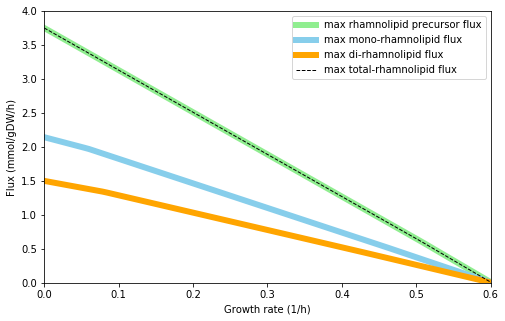

In [21]:
plt.figure(figsize=(8, 5))
plt.plot('growthRate', 'preRHLFlux', data=df, marker=None, color='lightgreen', linewidth=6, label="max rhamnolipid precursor flux")
plt.plot('growthRate', 'monoRHLFlux', data=df, marker=None, color='skyblue', linewidth=6, label="max mono-rhamnolipid flux")
plt.plot('growthRate', 'diRHLFlux', data=df, marker=None, color='orange', linewidth=6, label="max di-rhamnolipid flux")
plt.plot('growthRate', 'totalRHLFlux', data=df, marker=None,color='black', linewidth=1, label="max total-rhamnolipid flux", linestyle='--')
plt.legend()
plt.xlabel('Growth rate (1/h)')
plt.ylabel('Flux (mmol/gDW/h)')
plt.xlim([0,0.6])
plt.ylim([0,4])
plt.show()